# Preprocessing  
Machine learning algorithms to predict if users will click on an advertisement

**PROBLEM**
The data consists of 10 variables: 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', Timestamp' and 'Clicked on Ad'. The main variable we are interested in is 'Clicked on Ad'. This variable can have two possible outcomes: 0 and 1 where 0 refers to the case where a user didn't click the advertisement, while 1 refers to the scenario where a user clicks the advertisement.

We will see if we can use the other 9 variables to accurately predict the value **'Clicked on Ad'** variable. We will also perform some exploratory data analysis to see how *'Daily Time Spent on Site'* in combination with 'Ad Topic Line' affects the user's decision to click on the add.

Source: https://www.kaggle.com/datasets/hiimanshuagarwal/advertising-ef

## 1. Import the relevant libraries 

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotnine import *
import pycountry_convert as pc
from sklearn.preprocessing import StandardScaler

## 2. Load and explore the data

In [19]:
df = pd.read_csv('advertising_ef.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


## 3. Clean the data

### 3.1. Characterize the missing data

#### 3.1.1. Proportion of missing data 
Rule of decision:
"Schafer ( 1999 ) asserted that a missing rate of 5% or less is inconsequential. Bennett ( 2001 ) maintained that statistical analysis is likely to be biased when more than 10% of data are missing" (1)

In [20]:
# Finding null values per feature

df.isnull().sum().sort_values(ascending=False)

Country                     13
Age                         11
Area Income                 11
City                        11
Daily Time Spent on Site     4
Daily Internet Usage         4
Ad Topic Line                0
Gender                       0
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [21]:
#Finding the % of null values per feature

df.isnull().mean().sort_values(ascending=False)*100

Country                     1.288404
Age                         1.090188
Area Income                 1.090188
City                        1.090188
Daily Time Spent on Site    0.396432
Daily Internet Usage        0.396432
Ad Topic Line               0.000000
Gender                      0.000000
Timestamp                   0.000000
Clicked on Ad               0.000000
dtype: float64

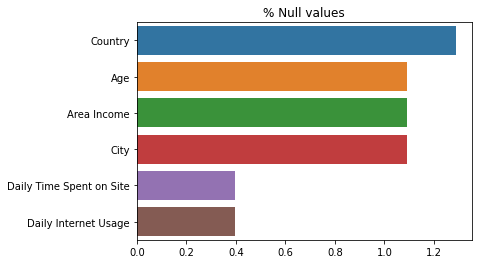

In [22]:
#Visualizing the percentage of missing value per feature
null_values = df.isnull().mean().sort_values(ascending=False)*100
null_values = null_values[null_values>0]
sns.barplot(x=null_values.values,y=null_values.index).set_title('% Null values')
plt.show()

In [23]:
#Finding the total percentage of null values

df.isnull().values.mean()*100

0.535183349851338

**Conclusion:** The percentage of missing values is fewer than 5% then the dataset is not likely to be biased.

#### 3.1.2. Mechanisms of Missing data 

1. **Missing Completely At Random (MCAR):** No relationship between the fact that data is missing and either the observed or unobserved covariates
1. **Missing At Random:** The missingness is still random but can have some relationship with other variables in the data
1. **Missing Not At Random:** The Data missed is directly correlated with the value of the missing data. (2)

**Solution:**
Use Little's test. If p.value <0.05 the data is not MCAR.

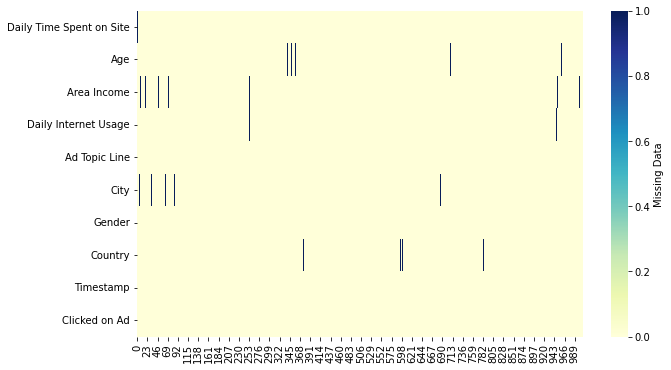

In [24]:
plt.figure(figsize = (10,6))
sns.heatmap(df.isna().transpose(),
            cmap = 'YlGnBu',
            cbar_kws = {'label': 'Missing Data'})
plt.show()

**Conclusion:** The heatmap shows that the values have a p.value>0.05 therefore the data can be treated as MCAR. Additionally, there is not spotted any pattern in the missing data.

### 3.2. Deal with missing data

Since the missing data can be considered as Missing Completely at Random and the percentage of missingness is around 5%, the missing data can be dealt by deletion.

In [25]:
# Drop rows of dataFrame with null values

df = df.dropna()

# Check that there are not missing values
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [26]:
#Check size of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  956 non-null    float64
 1   Age                       956 non-null    float64
 2   Area Income               956 non-null    float64
 3   Daily Internet Usage      956 non-null    float64
 4   Ad Topic Line             956 non-null    object 
 5   City                      956 non-null    object 
 6   Gender                    956 non-null    object 
 7   Country                   956 non-null    object 
 8   Timestamp                 956 non-null    object 
 9   Clicked on Ad             956 non-null    int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 82.2+ KB


### 3.3. Deal with Duplicates 

In [27]:
df[df.duplicated()]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad


There are not duplicates nor data that could be considered as unique (user ID vs Timestamp). Thus, there is no need to deal with duplicates.

## 4. Data preparation

In [28]:
# Find unique values
df.nunique()

Daily Time Spent on Site    863
Age                          43
Area Income                 955
Daily Internet Usage        922
Ad Topic Line               955
City                        929
Gender                        2
Country                     237
Timestamp                   952
Clicked on Ad                 2
dtype: int64

In [29]:
# Finding numerical values and their description
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,956.000000,956.000000,956.000000,956.000000,956.000000
mean,64.991381,36.024059,54994.663609,179.687887,0.505230
std,15.868862,8.804119,13306.592958,43.984389,0.500234
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,51.360000,29.000000,46971.640000,138.647500,0.000000
50%,67.975000,35.000000,56985.410000,182.425000,1.000000
75%,78.585000,42.000000,65315.467500,218.182500,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


#### 4.1. Prepare Categorical features

The rest of columns of the data Frame are categorical and some of them are worthy to transform into numerical to look for correlations.

* **Ad Topic:** This column has 955 unique entries and since there is no further description of the category of the add, there will not be considered for analysis. However, if it could be provided with an amplified description that allows categorizing the data, it would be highly recommended for analysis.
* **City:** There are 929 unique entries which is more than 97% of this column. Thus, due to the high variation this feature will not provide more information.

In [30]:
df = df.drop(columns = ['Ad Topic Line','City'])
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Female,Tunisia,27-03-2016 00:53,0
2,69.47,26.0,59785.94,236.50,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Female,Iceland,03-06-2016 03:36,0
6,88.91,33.0,53852.85,208.36,Female,Myanmar,28-01-2016 20:59,0
...,...,...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,Male,Lebanon,11-02-2016 21:49,1
1005,51.30,45.0,67782.17,134.42,Male,Bosnia and Herzegovina,22-04-2016 02:07,1
1006,51.63,51.0,42415.72,120.37,Male,Mongolia,01-02-2016 17:24,1
1007,55.55,19.0,41920.79,187.95,Female,Guatemala,24-03-2016 02:35,0


* **Gender:** Turn into nominal data. If Gender is Female, turn into 1, else turn into 0

In [31]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,1,Tunisia,27-03-2016 00:53,0
2,69.47,26.0,59785.94,236.50,1,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,0,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,1,Iceland,03-06-2016 03:36,0
6,88.91,33.0,53852.85,208.36,1,Myanmar,28-01-2016 20:59,0
...,...,...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,0,Lebanon,11-02-2016 21:49,1
1005,51.30,45.0,67782.17,134.42,0,Bosnia and Herzegovina,22-04-2016 02:07,1
1006,51.63,51.0,42415.72,120.37,0,Mongolia,01-02-2016 17:24,1
1007,55.55,19.0,41920.79,187.95,1,Guatemala,24-03-2016 02:35,0


In [32]:
# Create a Checkpoint

df_change_features = df.copy ()

* **Timestamp:** All the data belongs to the same year so to create relevant values it would be turn into periods

In [33]:
type(df_change_features['Timestamp'][0])

str

In [34]:
df_change_features['Timestamp'] = pd.to_datetime(df_change_features['Timestamp'], format = '%d-%m-%Y %H:%M')
df_change_features['Timestamp']

0      2016-03-27 00:53:00
2      2016-03-13 20:35:00
3      2016-01-10 02:31:00
4      2016-06-03 03:36:00
6      2016-01-28 20:59:00
               ...        
1004   2016-02-11 21:49:00
1005   2016-04-22 02:07:00
1006   2016-02-01 17:24:00
1007   2016-03-24 02:35:00
1008   2016-06-03 21:43:00
Name: Timestamp, Length: 956, dtype: datetime64[ns]

In [35]:
type(df_change_features['Timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [36]:
df_change_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  956 non-null    float64       
 1   Age                       956 non-null    float64       
 2   Area Income               956 non-null    float64       
 3   Daily Internet Usage      956 non-null    float64       
 4   Gender                    956 non-null    int64         
 5   Country                   956 non-null    object        
 6   Timestamp                 956 non-null    datetime64[ns]
 7   Clicked on Ad             956 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 99.5+ KB


In [37]:
df_change_features['Timestamp'].iloc[5]

Timestamp('2016-07-11 01:42:00')

In [38]:
df_change_features['Timestamp'].iloc[5].month

7

In [39]:
#Extracting the month
list_months = []
for i in range(df_change_features.shape[0]):
    list_months.append(df_change_features['Timestamp'].iloc[i].month)
list_months

[3,
 3,
 1,
 6,
 1,
 7,
 3,
 6,
 4,
 3,
 3,
 5,
 2,
 3,
 5,
 3,
 6,
 5,
 2,
 7,
 4,
 1,
 7,
 3,
 1,
 3,
 4,
 4,
 2,
 5,
 3,
 4,
 2,
 2,
 2,
 2,
 6,
 4,
 4,
 5,
 1,
 3,
 2,
 4,
 2,
 4,
 2,
 5,
 4,
 6,
 3,
 3,
 3,
 1,
 6,
 1,
 4,
 2,
 3,
 5,
 4,
 1,
 5,
 2,
 2,
 1,
 5,
 1,
 4,
 6,
 7,
 5,
 3,
 5,
 5,
 2,
 5,
 4,
 2,
 7,
 4,
 1,
 3,
 7,
 7,
 6,
 7,
 2,
 6,
 2,
 7,
 4,
 3,
 1,
 7,
 3,
 1,
 2,
 6,
 7,
 7,
 7,
 6,
 5,
 4,
 2,
 6,
 5,
 4,
 4,
 4,
 7,
 5,
 6,
 1,
 1,
 1,
 4,
 5,
 3,
 2,
 4,
 2,
 3,
 6,
 2,
 3,
 1,
 2,
 5,
 6,
 4,
 2,
 5,
 3,
 2,
 6,
 2,
 1,
 2,
 5,
 6,
 6,
 1,
 1,
 7,
 1,
 4,
 7,
 5,
 1,
 5,
 3,
 7,
 6,
 7,
 2,
 2,
 3,
 5,
 1,
 1,
 5,
 2,
 6,
 2,
 3,
 6,
 2,
 6,
 1,
 3,
 6,
 7,
 2,
 5,
 7,
 3,
 1,
 1,
 1,
 6,
 2,
 5,
 3,
 5,
 2,
 4,
 1,
 6,
 6,
 7,
 2,
 5,
 4,
 4,
 6,
 3,
 5,
 6,
 1,
 7,
 3,
 3,
 2,
 4,
 2,
 4,
 7,
 4,
 4,
 3,
 7,
 6,
 3,
 3,
 5,
 7,
 5,
 1,
 7,
 2,
 6,
 6,
 6,
 1,
 4,
 1,
 2,
 4,
 6,
 1,
 3,
 7,
 1,
 1,
 1,
 6,
 5,
 6,
 3,
 6,
 2,
 4,
 7,
 2,
 2,
 4,
 2,
 1,


In [40]:
df_change_features['Month'] = list_months
df_change_features.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Country,Timestamp,Clicked on Ad,Month
0,68.95,35.0,61833.90,256.09,1,Tunisia,2016-03-27 00:53:00,0,3
2,69.47,26.0,59785.94,236.50,1,San Marino,2016-03-13 20:35:00,0,3
3,74.15,29.0,54806.18,245.89,0,Italy,2016-01-10 02:31:00,0,1
4,68.37,35.0,73889.99,225.58,1,Iceland,2016-06-03 03:36:00,0,6
6,88.91,33.0,53852.85,208.36,1,Myanmar,2016-01-28 20:59:00,0,1


In [41]:
# Extract day of the week and turn to dummy variable
# Monday is 0, Tuesday is 1 ... Sunday is 6
df_change_features['Timestamp'].iloc[5].weekday()

0

In [42]:
def date_to_weekday(date_value):
    """Function that returns the day of the week from a date"""
    return date_value.weekday()

In [43]:
df_change_features['Day of the week'] = df_change_features['Timestamp'].apply(date_to_weekday)
df_change_features.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Country,Timestamp,Clicked on Ad,Month,Day of the week
0,68.95,35.0,61833.90,256.09,1,Tunisia,2016-03-27 00:53:00,0,3,6
2,69.47,26.0,59785.94,236.50,1,San Marino,2016-03-13 20:35:00,0,3,6
3,74.15,29.0,54806.18,245.89,0,Italy,2016-01-10 02:31:00,0,1,6
4,68.37,35.0,73889.99,225.58,1,Iceland,2016-06-03 03:36:00,0,6,4
6,88.91,33.0,53852.85,208.36,1,Myanmar,2016-01-28 20:59:00,0,1,3


In [44]:
df_change_features['Timestamp'].iloc[1].hour

20

In [45]:
#Extracting the hour
list_hours = []
for i in range(df_change_features.shape[0]):
    list_hours.append(df_change_features['Timestamp'].iloc[i].hour)
list_hours

[0,
 20,
 2,
 3,
 20,
 1,
 20,
 1,
 21,
 9,
 3,
 7,
 7,
 13,
 8,
 9,
 17,
 15,
 10,
 8,
 5,
 12,
 20,
 22,
 14,
 3,
 3,
 15,
 5,
 17,
 6,
 11,
 0,
 13,
 13,
 22,
 18,
 11,
 7,
 21,
 9,
 4,
 7,
 3,
 11,
 0,
 17,
 22,
 8,
 5,
 14,
 20,
 23,
 0,
 22,
 11,
 20,
 9,
 0,
 17,
 16,
 4,
 21,
 7,
 21,
 16,
 14,
 17,
 7,
 15,
 4,
 12,
 23,
 0,
 11,
 20,
 20,
 2,
 6,
 21,
 15,
 22,
 8,
 14,
 9,
 9,
 14,
 22,
 11,
 3,
 17,
 5,
 14,
 23,
 4,
 6,
 5,
 4,
 7,
 16,
 11,
 4,
 18,
 12,
 16,
 19,
 13,
 4,
 15,
 10,
 21,
 16,
 9,
 18,
 16,
 0,
 10,
 12,
 6,
 23,
 23,
 11,
 19,
 18,
 11,
 23,
 1,
 3,
 8,
 7,
 2,
 19,
 6,
 20,
 6,
 22,
 10,
 6,
 19,
 2,
 2,
 0,
 9,
 15,
 3,
 12,
 23,
 18,
 18,
 6,
 7,
 22,
 14,
 4,
 1,
 18,
 18,
 6,
 9,
 2,
 3,
 21,
 13,
 19,
 13,
 8,
 13,
 21,
 7,
 17,
 5,
 18,
 3,
 21,
 20,
 6,
 11,
 2,
 8,
 23,
 21,
 0,
 15,
 7,
 3,
 18,
 2,
 8,
 2,
 2,
 18,
 12,
 4,
 21,
 21,
 11,
 3,
 14,
 21,
 17,
 7,
 0,
 10,
 9,
 7,
 7,
 19,
 14,
 1,
 4,
 20,
 6,
 7,
 11,
 23,
 7,
 0,
 21,
 21,
 20,

In [46]:
df_change_features['Timestamp'].iloc[1].minute

35

In [47]:
#Extracting the minutes
list_minutes = []
for i in range(df_change_features.shape[0]):
    list_minutes.append(df_change_features['Timestamp'].iloc[i].minute)
list_minutes

[53,
 35,
 31,
 36,
 59,
 42,
 19,
 14,
 49,
 31,
 41,
 0,
 53,
 22,
 49,
 43,
 27,
 25,
 46,
 32,
 8,
 38,
 23,
 13,
 0,
 12,
 26,
 18,
 28,
 11,
 49,
 53,
 23,
 26,
 16,
 46,
 54,
 1,
 7,
 19,
 31,
 57,
 36,
 56,
 42,
 13,
 5,
 49,
 7,
 30,
 45,
 55,
 36,
 17,
 11,
 35,
 10,
 0,
 37,
 39,
 21,
 18,
 31,
 59,
 55,
 10,
 41,
 56,
 34,
 25,
 41,
 12,
 13,
 19,
 51,
 47,
 49,
 2,
 41,
 18,
 14,
 47,
 46,
 57,
 22,
 27,
 55,
 4,
 31,
 50,
 17,
 50,
 57,
 37,
 33,
 46,
 44,
 37,
 33,
 12,
 46,
 10,
 32,
 51,
 2,
 48,
 15,
 27,
 54,
 7,
 30,
 0,
 0,
 50,
 1,
 23,
 7,
 9,
 9,
 59,
 47,
 23,
 6,
 46,
 59,
 8,
 39,
 56,
 2,
 58,
 43,
 48,
 37,
 41,
 36,
 51,
 11,
 51,
 16,
 13,
 58,
 16,
 35,
 10,
 54,
 7,
 14,
 34,
 36,
 19,
 39,
 47,
 23,
 37,
 22,
 6,
 52,
 52,
 11,
 15,
 22,
 48,
 30,
 42,
 16,
 53,
 37,
 2,
 42,
 16,
 34,
 0,
 19,
 16,
 36,
 14,
 4,
 35,
 1,
 48,
 48,
 29,
 37,
 22,
 59,
 35,
 40,
 31,
 58,
 1,
 37,
 57,
 21,
 17,
 13,
 51,
 14,
 13,
 7,
 52,
 36,
 24,
 13,
 12,
 30,
 30,

In [48]:
# Change the minutes into hours to add to hours
minutes_to_hours = []
for i in list_minutes:
    minutes_to_hour = list_minutes[i]/60
    minutes_to_hours.append(minutes_to_hour)

# Add minutes_to_hours to list hours and get an integer

hour_24 = [sum(value) for value in zip(minutes_to_hours,list_hours)]
hour_24

[0.2833333333333333,
 20.766666666666666,
 2.8833333333333333,
 3.9,
 20.65,
 1.6,
 20.533333333333335,
 1.8166666666666667,
 21.5,
 9.883333333333333,
 3.95,
 7.883333333333333,
 7.283333333333333,
 13.383333333333333,
 8.5,
 9.933333333333334,
 17.3,
 15.2,
 10.083333333333334,
 8.383333333333333,
 5.816666666666666,
 12.116666666666667,
 20.216666666666665,
 22.366666666666667,
 14.883333333333333,
 3.8833333333333333,
 3.4333333333333336,
 15.766666666666667,
 5.466666666666667,
 17.0,
 6.5,
 11.283333333333333,
 0.21666666666666667,
 13.433333333333334,
 13.45,
 22.083333333333332,
 18.183333333333334,
 11.583333333333334,
 7.233333333333333,
 21.533333333333335,
 9.883333333333333,
 4.0,
 7.9,
 3.1666666666666665,
 11.6,
 0.36666666666666664,
 17.7,
 22.5,
 8.233333333333333,
 5.816666666666666,
 14.216666666666667,
 20.583333333333332,
 23.9,
 0.4166666666666667,
 22.0,
 11.766666666666667,
 20.683333333333334,
 9.883333333333333,
 0.016666666666666666,
 17.316666666666666,
 16.

In [49]:
hour_24_int = [round(item) for item in hour_24]
hour_24_int

[0,
 21,
 3,
 4,
 21,
 2,
 21,
 2,
 22,
 10,
 4,
 8,
 7,
 13,
 8,
 10,
 17,
 15,
 10,
 8,
 6,
 12,
 20,
 22,
 15,
 4,
 3,
 16,
 5,
 17,
 6,
 11,
 0,
 13,
 13,
 22,
 18,
 12,
 7,
 22,
 10,
 4,
 8,
 3,
 12,
 0,
 18,
 22,
 8,
 6,
 14,
 21,
 24,
 0,
 22,
 12,
 21,
 10,
 0,
 17,
 17,
 5,
 22,
 8,
 22,
 17,
 15,
 17,
 7,
 15,
 5,
 13,
 23,
 1,
 12,
 21,
 20,
 3,
 7,
 22,
 16,
 23,
 8,
 14,
 9,
 9,
 15,
 23,
 12,
 4,
 17,
 6,
 14,
 23,
 4,
 6,
 6,
 4,
 7,
 17,
 11,
 5,
 18,
 13,
 17,
 19,
 14,
 4,
 15,
 10,
 22,
 17,
 10,
 19,
 17,
 0,
 10,
 13,
 7,
 24,
 24,
 11,
 19,
 18,
 12,
 24,
 1,
 3,
 9,
 8,
 3,
 19,
 6,
 21,
 7,
 23,
 10,
 7,
 19,
 2,
 3,
 0,
 10,
 16,
 3,
 12,
 24,
 18,
 19,
 7,
 7,
 23,
 14,
 4,
 1,
 18,
 19,
 7,
 9,
 3,
 3,
 21,
 14,
 20,
 13,
 8,
 13,
 22,
 8,
 17,
 5,
 19,
 4,
 21,
 21,
 7,
 12,
 3,
 9,
 23,
 21,
 0,
 15,
 7,
 4,
 19,
 3,
 9,
 3,
 3,
 18,
 12,
 5,
 21,
 21,
 12,
 4,
 14,
 21,
 18,
 8,
 0,
 10,
 10,
 8,
 8,
 19,
 14,
 2,
 4,
 20,
 7,
 8,
 12,
 24,
 8,
 1,
 21,
 2

In [50]:
# append hour_24_int to df
df_change_features['Hour 24'] = hour_24_int
df_change_features.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Country,Timestamp,Clicked on Ad,Month,Day of the week,Hour 24
0,68.95,35.0,61833.90,256.09,1,Tunisia,2016-03-27 00:53:00,0,3,6,0
2,69.47,26.0,59785.94,236.50,1,San Marino,2016-03-13 20:35:00,0,3,6,21
3,74.15,29.0,54806.18,245.89,0,Italy,2016-01-10 02:31:00,0,1,6,3
4,68.37,35.0,73889.99,225.58,1,Iceland,2016-06-03 03:36:00,0,6,4,4
6,88.91,33.0,53852.85,208.36,1,Myanmar,2016-01-28 20:59:00,0,1,3,21


In [51]:
# drop timestamp
df_change_features = df_change_features.drop(columns = ['Timestamp'])
df_change_features

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Country,Clicked on Ad,Month,Day of the week,Hour 24
0,68.95,35.0,61833.90,256.09,1,Tunisia,0,3,6,0
2,69.47,26.0,59785.94,236.50,1,San Marino,0,3,6,21
3,74.15,29.0,54806.18,245.89,0,Italy,0,1,6,3
4,68.37,35.0,73889.99,225.58,1,Iceland,0,6,4,4
6,88.91,33.0,53852.85,208.36,1,Myanmar,0,1,3,21
...,...,...,...,...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,0,Lebanon,1,2,3,22
1005,51.30,45.0,67782.17,134.42,0,Bosnia and Herzegovina,1,4,4,2
1006,51.63,51.0,42415.72,120.37,0,Mongolia,1,2,0,17
1007,55.55,19.0,41920.79,187.95,1,Guatemala,0,3,3,3


* **Country:** There are 237 unique entries and the data is highly disperse. To create a more relevant feature, the countries could be grouped by regions

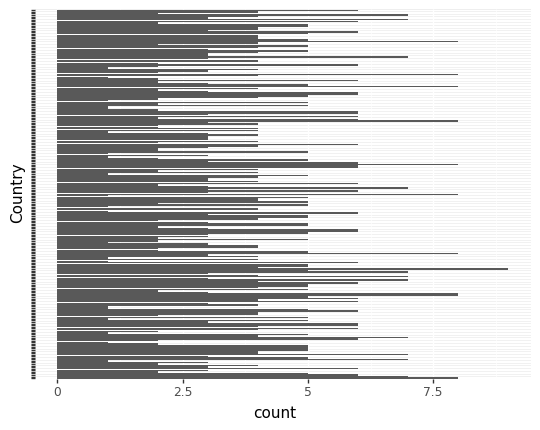

<ggplot: (167980712597)>

In [123]:
# Visualizing countries dispersion
(
    ggplot(data = df_change_features) 
    + geom_bar() 
    + aes(x = 'Country')
    + theme(axis_text_y = element_blank())
    + coord_flip()
)

In [109]:
df_countries = df_change_features.copy()

To assign each country to its continent, the library pycountry_convert will be used as follows:

In [110]:
def convert(row):
    try:
    #convert country name to country code
        cn_code = pc.country_name_to_country_alpha2(row.Country, cn_name_format = 'default')
            
    #convert cn_code to continent code
        conti_code = pc.country_alpha2_to_continent_code(cn_code)
    except:
        conti_code = 'Undefined' #In case the country does not fit with ISO 3166-1 alpha-2 code
    return conti_code

In [111]:
df_countries['Continent'] = df_countries.apply(convert, axis =1)
df_countries

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Country,Clicked on Ad,Month,Day of the week,Hour 24,Continent
0,68.95,35.0,61833.90,256.09,1,Tunisia,0,3,6,0,AF
2,69.47,26.0,59785.94,236.50,1,San Marino,0,3,6,21,EU
3,74.15,29.0,54806.18,245.89,0,Italy,0,1,6,3,EU
4,68.37,35.0,73889.99,225.58,1,Iceland,0,6,4,4,EU
6,88.91,33.0,53852.85,208.36,1,Myanmar,0,1,3,21,AS
...,...,...,...,...,...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,0,Lebanon,1,2,3,22,AS
1005,51.30,45.0,67782.17,134.42,0,Bosnia and Herzegovina,1,4,4,2,EU
1006,51.63,51.0,42415.72,120.37,0,Mongolia,1,2,0,17,AS
1007,55.55,19.0,41920.79,187.95,1,Guatemala,0,3,3,3,NA


In [112]:
df_countries['Continent'].unique()

array(['AF', 'EU', 'AS', 'NA', 'Undefined', 'OC', 'SA', 'AN'],
      dtype=object)

In [113]:
df_countries['Continent'].value_counts()

AS           198
EU           196
AF           182
NA           147
OC            96
Undefined     71
SA            63
AN             3
Name: Continent, dtype: int64

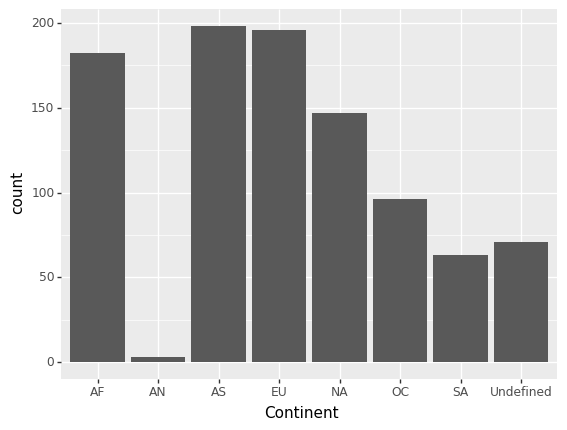

<ggplot: (167980598510)>

In [114]:
# Visualizing continent dispersion
ggplot(data = df_countries) + geom_bar(mapping = aes(x = 'Continent'))

In [115]:
#turn continents into a dummy variable
conti_codes = {'AF':1,
               'EU':2,
               'AS':3,
               'NA':4,
               'Undefined':5,
               'OC':6,
               'SA':7,
               'AN':8}
df_countries['Continent'] = df_countries['Continent'].map(conti_codes)
df_countries

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Country,Clicked on Ad,Month,Day of the week,Hour 24,Continent
0,68.95,35.0,61833.90,256.09,1,Tunisia,0,3,6,0,1
2,69.47,26.0,59785.94,236.50,1,San Marino,0,3,6,21,2
3,74.15,29.0,54806.18,245.89,0,Italy,0,1,6,3,2
4,68.37,35.0,73889.99,225.58,1,Iceland,0,6,4,4,2
6,88.91,33.0,53852.85,208.36,1,Myanmar,0,1,3,21,3
...,...,...,...,...,...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,0,Lebanon,1,2,3,22,3
1005,51.30,45.0,67782.17,134.42,0,Bosnia and Herzegovina,1,4,4,2,2
1006,51.63,51.0,42415.72,120.37,0,Mongolia,1,2,0,17,3
1007,55.55,19.0,41920.79,187.95,1,Guatemala,0,3,3,3,4


In [116]:
df_countries = df_countries.drop(columns = ['Country'])
df_countries

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Month,Day of the week,Hour 24,Continent
0,68.95,35.0,61833.90,256.09,1,0,3,6,0,1
2,69.47,26.0,59785.94,236.50,1,0,3,6,21,2
3,74.15,29.0,54806.18,245.89,0,0,1,6,3,2
4,68.37,35.0,73889.99,225.58,1,0,6,4,4,2
6,88.91,33.0,53852.85,208.36,1,0,1,3,21,3
...,...,...,...,...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,0,1,2,3,22,3
1005,51.30,45.0,67782.17,134.42,0,1,4,4,2,2
1006,51.63,51.0,42415.72,120.37,0,1,2,0,17,3
1007,55.55,19.0,41920.79,187.95,1,0,3,3,3,4


In [117]:
# Create a Checkpoint
df_preprocessed = df_countries.copy()
df_preprocessed.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Month,Day of the week,Hour 24,Continent
0,68.95,35.0,61833.90,256.09,1,0,3,6,0,1
2,69.47,26.0,59785.94,236.50,1,0,3,6,21,2
3,74.15,29.0,54806.18,245.89,0,0,1,6,3,2
4,68.37,35.0,73889.99,225.58,1,0,6,4,4,2
6,88.91,33.0,53852.85,208.36,1,0,1,3,21,3
9,69.88,20.0,55642.32,183.82,0,0,7,0,2,1
10,47.64,49.0,45632.51,122.02,1,1,3,2,21,3
12,69.57,48.0,51636.92,113.12,0,1,6,4,2,1
13,79.52,24.0,51739.63,214.23,1,0,4,2,22,2
14,42.95,33.0,30976.00,143.56,1,1,3,3,10,4


In [118]:
df_preprocessed.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Month,Day of the week,Hour 24,Continent
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000
mean,64.991381,36.024059,54994.663609,179.687887,0.524059,0.505230,3.825314,3.065900,12.226987,3.297071
std,15.868862,8.804119,13306.592958,43.984389,0.499682,0.500234,1.931775,2.001792,7.024545,1.835551
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,51.360000,29.000000,46971.640000,138.647500,0.000000,0.000000,2.000000,1.000000,6.000000,2.000000
50%,67.975000,35.000000,56985.410000,182.425000,1.000000,1.000000,4.000000,3.000000,12.000000,3.000000
75%,78.585000,42.000000,65315.467500,218.182500,1.000000,1.000000,5.000000,5.000000,19.000000,4.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.000000,7.000000,6.000000,24.000000,8.000000


## 5. Correlation between features
It will be used the Pearson correlation matrix to identify the correlations between the independent feature (Clicked on Ad) and the dependent features.
For this project, any correlation bigger than |±0.3| will be considered for further investigation (3)

In [45]:
#usings a heatmap to confirm this
corr = df_preprocessed.corr(method='pearson')
corr

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Month,Day of the week,Hour 24,Continent
Daily Time Spent on Site,1.000000,-0.330955,0.303340,0.515004,0.025826,-0.745277,-0.002430,0.028594,0.002808,-0.024945
Age,-0.330955,1.000000,-0.169398,-0.365944,0.017125,0.485594,0.005973,0.004723,-0.048461,-0.011458
Area Income,0.303340,-0.169398,1.000000,0.324678,-0.004775,-0.463475,-0.052185,0.037511,0.017111,0.010360
Daily Internet Usage,0.515004,-0.365944,0.324678,1.000000,-0.026930,-0.783238,0.021516,0.021525,0.068942,0.012746
Gender,0.025826,0.017125,-0.004775,-0.026930,1.000000,0.037199,-0.018965,0.038717,-0.064652,-0.028350
Clicked on Ad,-0.745277,0.485594,-0.463475,-0.783238,0.037199,1.000000,0.005823,-0.017598,-0.039524,-0.019940
Month,-0.002430,0.005973,-0.052185,0.021516,-0.018965,0.005823,1.000000,-0.021390,-0.022771,0.003724
Day of the week,0.028594,0.004723,0.037511,0.021525,0.038717,-0.017598,-0.021390,1.000000,0.013158,0.026869
Hour 24,0.002808,-0.048461,0.017111,0.068942,-0.064652,-0.039524,-0.022771,0.013158,1.000000,-0.000931
Continent,-0.024945,-0.011458,0.010360,0.012746,-0.028350,-0.019940,0.003724,0.026869,-0.000931,1.000000


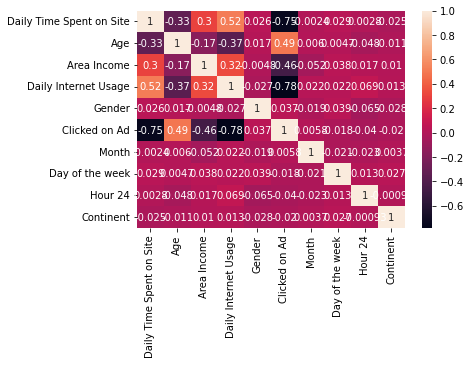

In [46]:
heatmap = sns.heatmap(corr, annot=True)

To spot any pattern or correlation between the different features, the following distribution diagrams will be displayed:

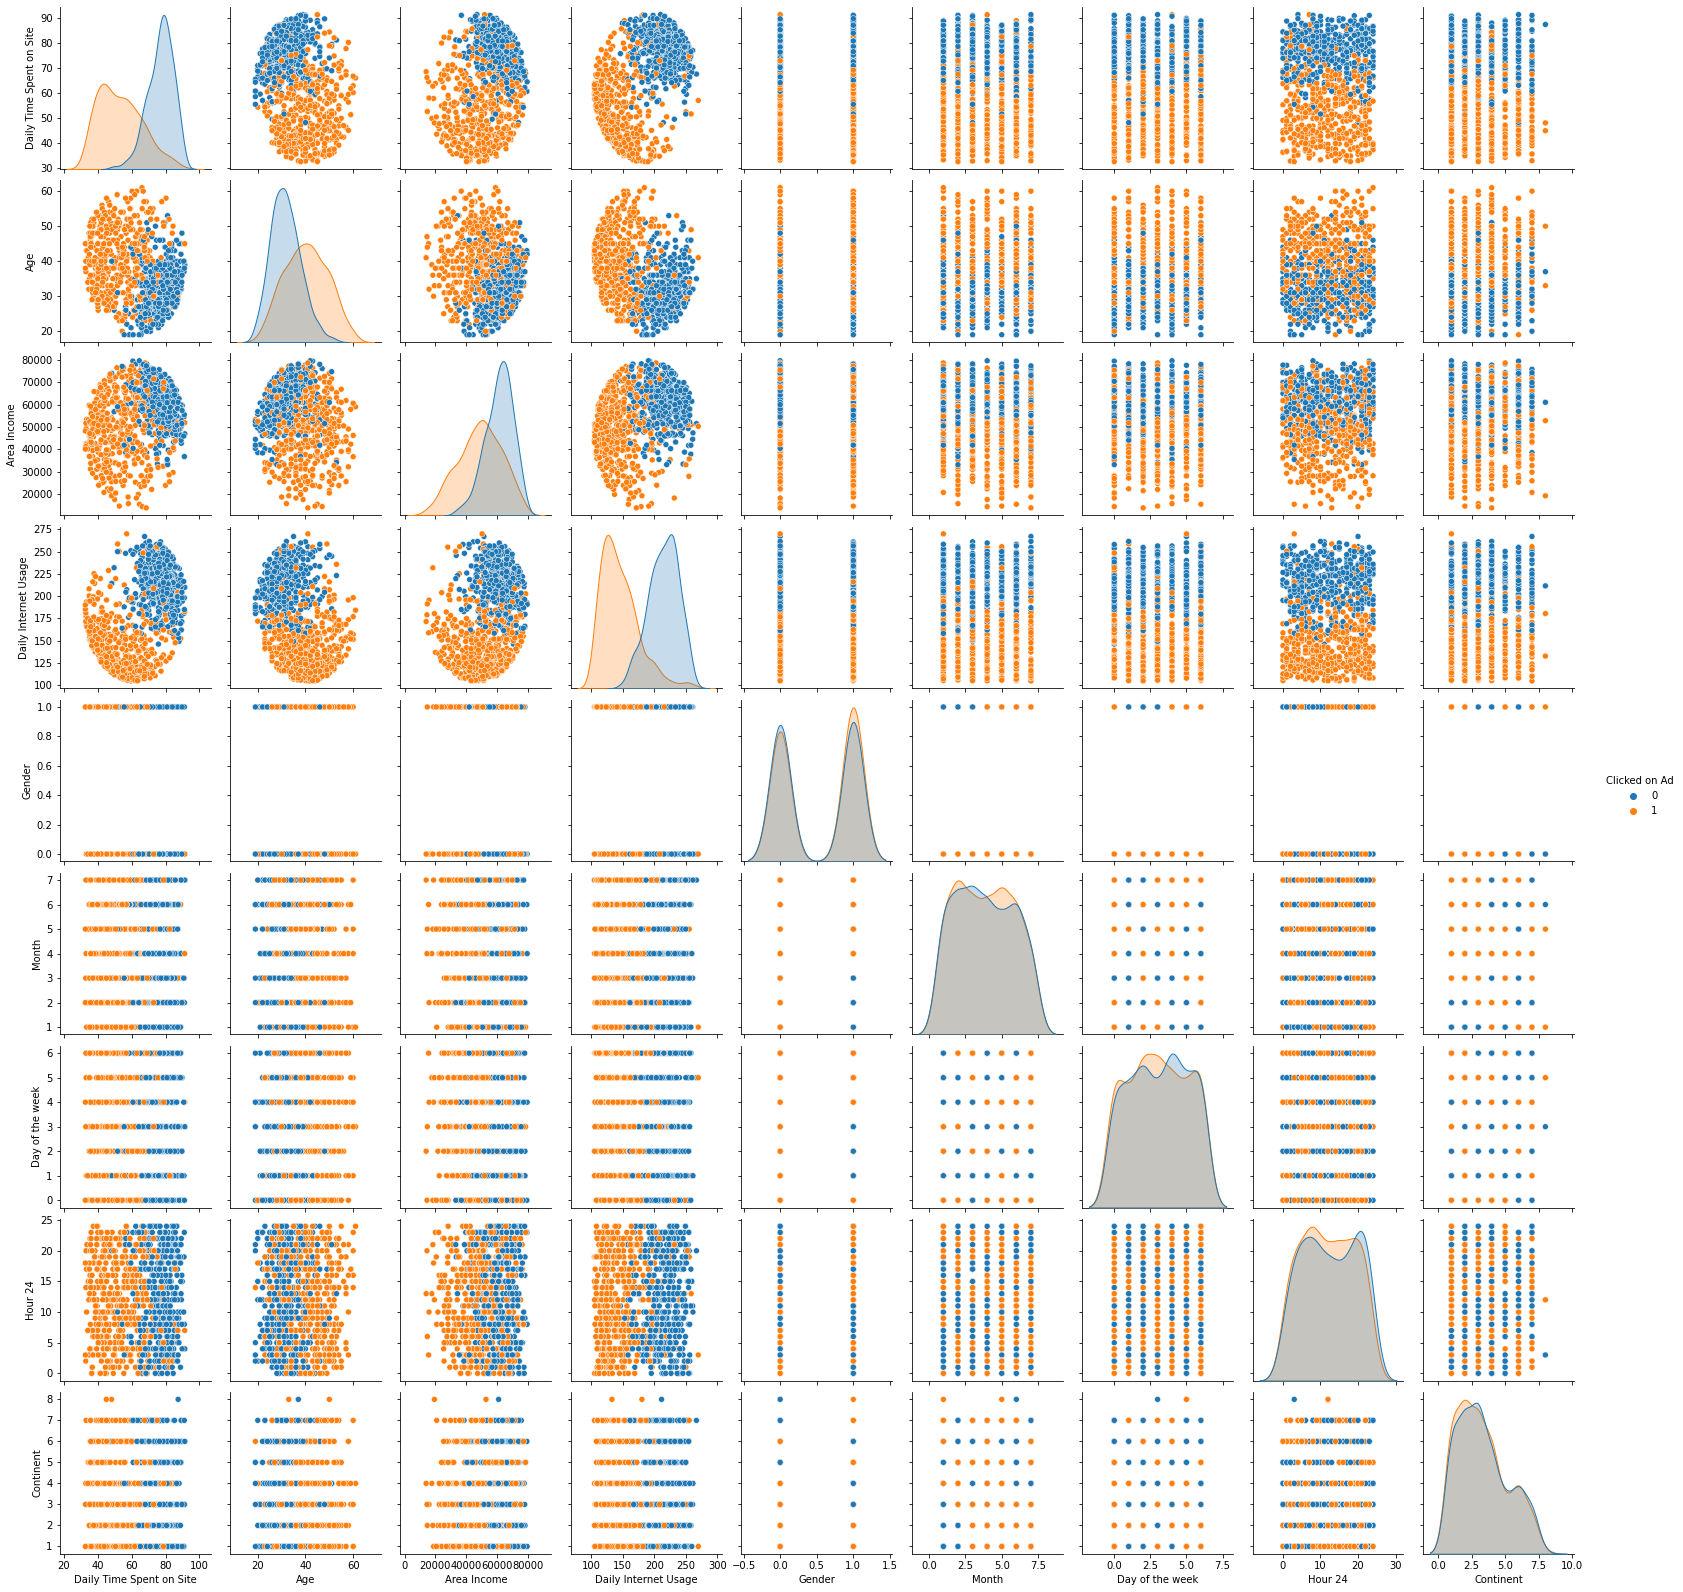

In [47]:
sns.pairplot(df_preprocessed, hue='Clicked on Ad', plot_kws={'color': 'magenta'}, diag_kws={'color': 'purple'})
#plots the numerical columns and gives the correlation and distribution

From the correlation matrix, the features to be considered for the ML model are:
* Daily Time Spent on Site 
* Age
* Area Income
* Daily Internet Usage

Thus, the other features will be dropped

In [48]:
# Create a Checkpoint
df_preprocessed = df_preprocessed.drop(columns = 
                                       ['Gender', 
                                       'Month', 
                                       'Day of the week', 
                                       'Hour 24', 
                                       'Continent'])
df_preprocessed

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35.0,61833.90,256.09,0
2,69.47,26.0,59785.94,236.50,0
3,74.15,29.0,54806.18,245.89,0
4,68.37,35.0,73889.99,225.58,0
6,88.91,33.0,53852.85,208.36,0
...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,1
1005,51.30,45.0,67782.17,134.42,1
1006,51.63,51.0,42415.72,120.37,1
1007,55.55,19.0,41920.79,187.95,0


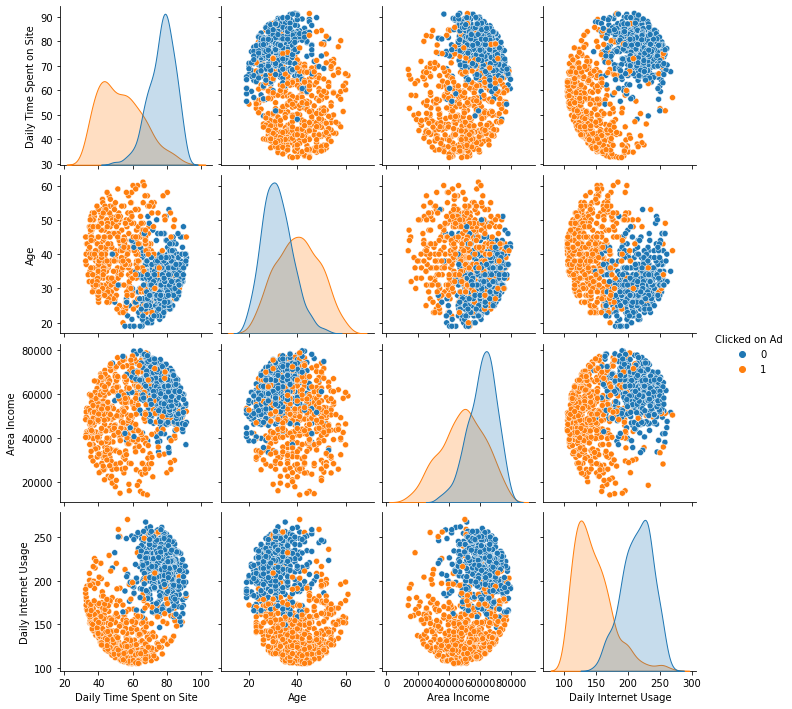

In [49]:
#Final correlations for the features chosen
sns.pairplot(df_preprocessed, hue='Clicked on Ad', plot_kws={'color': 'magenta'}, diag_kws={'color': 'purple'})

## 6. Check if the data is balanced

In [50]:
df_preprocessed['Clicked on Ad'].value_counts()

1    483
0    473
Name: Clicked on Ad, dtype: int64

In [52]:
483/len(df_preprocessed['Clicked on Ad'])*100

50.52301255230126

50.5% of the data are labelled as 1 value. Thus, the data can be taken as balanced.

## 7. Export the preprocessed data into a csv

In [51]:
df_preprocessed.to_csv('Click_on_advertisement_preprossed.csv', index=False)

# References:

1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3701793/
1. https://soprasteriaanalytics.se/2020/01/23/an-easy-way-to-deal-with-missing-data-imputation-by-regression/
1. https://www.questionpro.com/blog/wp-content/uploads/2020/04/Pearson1-1.png